In [89]:
import sklearn
import xgboost
import shap
 
import pandas as pd
import sklearn.linear_model
import sklearn.neural_network

import shap
import matplotlib.pyplot as plt

In [81]:
# 读取CSV文件
df = pd.read_csv(r'e:\work\sv_jourdan\sv\scores.csv')
last_column = df.iloc[:, -2]
all_but_last_column = df.iloc[:, 1:-2]
# train an XGBoost model
X, y = all_but_last_column,last_column
y  = y.values

In [82]:
X

,car-num,person-num,bicycle-num,wall,building,sky,tree,sidewalk,road,grass,person,plant,car,fence,bicycle,traffic light
0,7,1,0,0.000030,0.308205,0.182878,0.029910,0.091748,0.205362,0.000989,0.005112,0.000000,0.161095,0.000201,0.002670,0.000424
1,0,0,0,0.007845,0.279320,0.217052,0.013083,0.033811,0.254288,0.000377,0.009768,0.007327,0.138588,0.009366,0.000430,0.000057
2,2,2,2,0.000000,0.385550,0.176865,0.000000,0.090316,0.149361,0.000178,0.002943,0.000000,0.170497,0.001928,0.000000,0.000000
3,5,0,0,0.012851,0.331304,0.236952,0.001648,0.070895,0.147332,0.006709,0.000370,0.001335,0.117840,0.000469,0.000115,0.000000
4,6,1,0,0.001327,0.399872,0.165697,0.000246,0.064108,0.115862,0.013100,0.000820,0.006270,0.202625,0.004548,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,2,7,0,0.000000,0.287464,0.213332,0.014322,0.047643,0.253184,0.000407,0.003433,0.004696,0.156788,0.001541,0.000011,0.000012
1291,2,0,0,0.000000,0.176036,0.115486,0.225124,0.032939,0.360585,0.000207,0.000248,0.020261,0.065312,0.000000,0.001723,0.000000
1292,2,0,0,0.000527,0.131735,0.113169,0.272094,0.027526,0.363616,0.001023,0.001584,0.027884,0.053873,0.005516,0.000069,0.000000
1293,3,0,0,0.000006,0.007867,0.470010,0.009429,0.005198,0.312532,0.011936,0.000642,0.008316,0.111573,0.012054,0.000575,0.000000


In [83]:
y

array([4, 5, 6, ..., 2, 1, 1], dtype=int64)

In [84]:
model = xgboost.XGBRegressor().fit(X, y)

# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

In [85]:
shap_values

.values =
array([[-6.30869582e-02, -3.34005382e-01,  3.79320310e-02, ...,
        -7.43602798e-02, -8.08724097e-02,  2.10057689e-01],
       [-9.60338816e-01,  2.13254432e-01,  2.30956041e-02, ...,
        -1.27831273e-01,  1.99732257e-01, -3.11601726e-01],
       [ 5.25996454e-01, -7.95253942e-02, -4.72893706e-01, ...,
         2.46937128e-01, -1.09765782e-02, -7.09326337e-04],
       ...,
       [-2.89716753e-02,  1.19266717e-01,  3.92026583e-02, ...,
        -3.03781761e-01, -1.37896735e-01, -7.54144358e-02],
       [ 1.59607396e-01,  1.30916854e-01,  2.65025053e-02, ...,
        -5.56229340e-01,  1.48766095e-03, -8.18115074e-02],
       [ 1.29653993e-01,  3.55221848e-02,  4.98100830e-02, ...,
        -7.30322772e-02, -1.97883209e-01, -8.87437825e-02]])

.base_values =
array([4.92400416, 4.92400416, 4.92400416, ..., 4.92400416, 4.92400416,
       4.92400416])

.data =
array([[7.000000e+00, 1.000000e+00, 0.000000e+00, ..., 2.010610e-04,
        2.669806e-03, 4.241280e-04],
       [0.

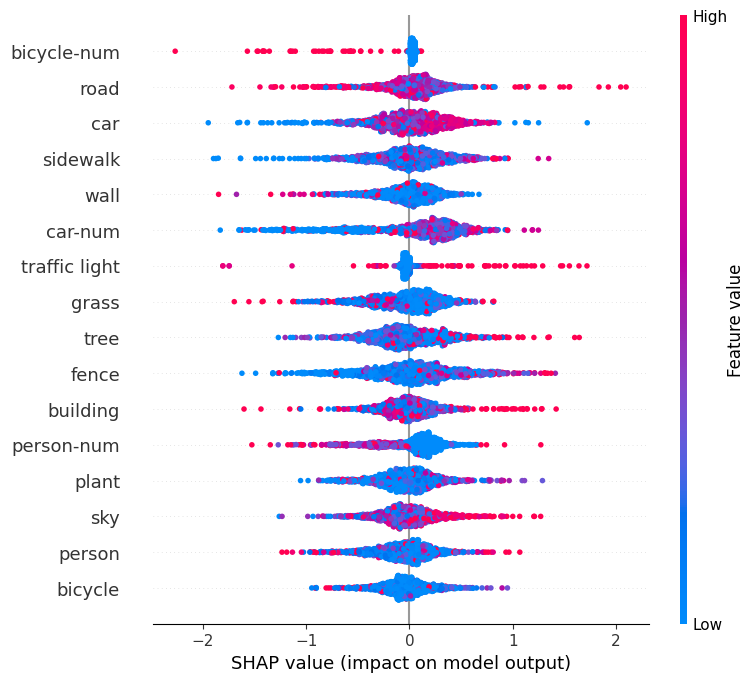

In [86]:
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0), max_display=20)

In [91]:
types = ['car-num','person-num','bicycle-num','wall','building'	,'sky',
 'tree','sidewalk','road','grass','person','plant','car','fence','bicycle','traffic light']


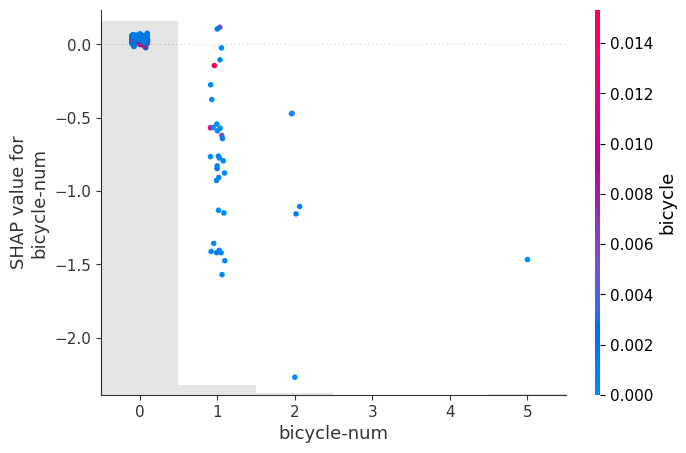

In [109]:
shap.plots.scatter(shap_values[:, "bicycle-num"], color=shap_values[:, "bicycle"],show=False)
plt.savefig(r"E:\work\sv_jourdan\素材\\"+ 'bicycle-num vs bicycle' +".png")

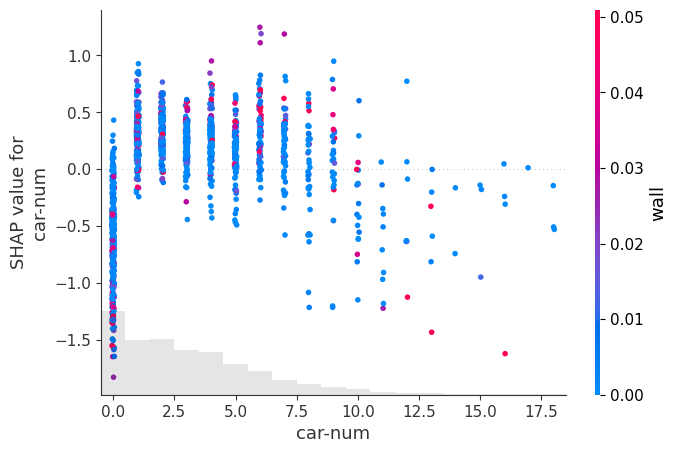

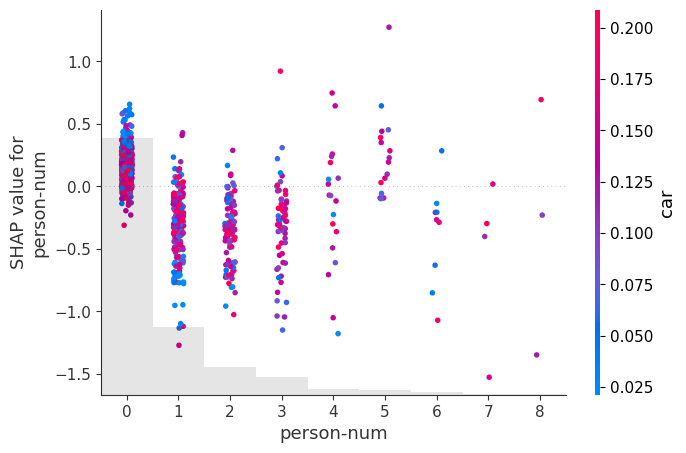

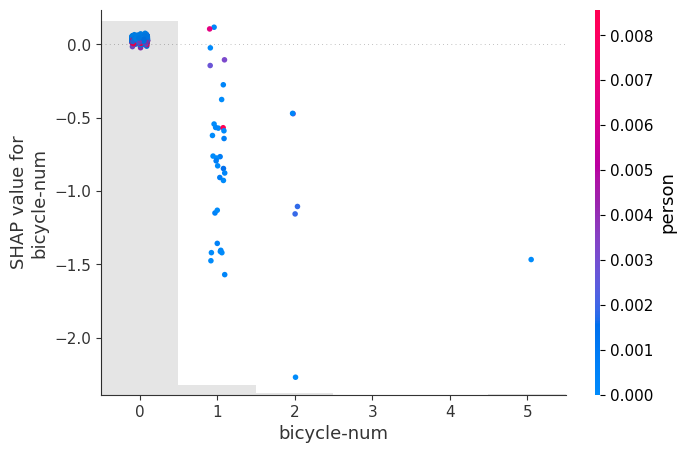

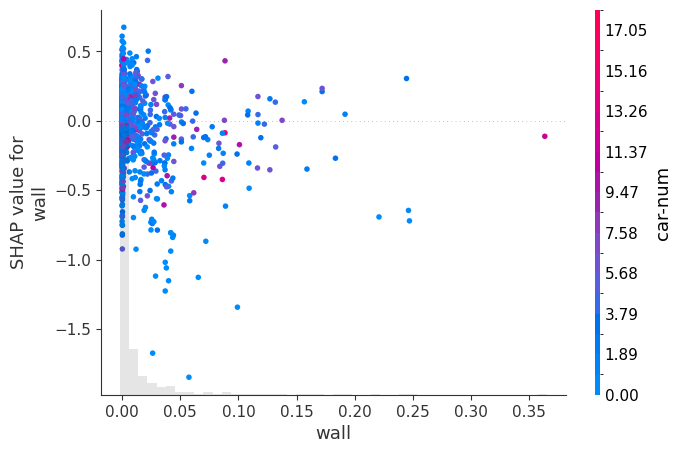

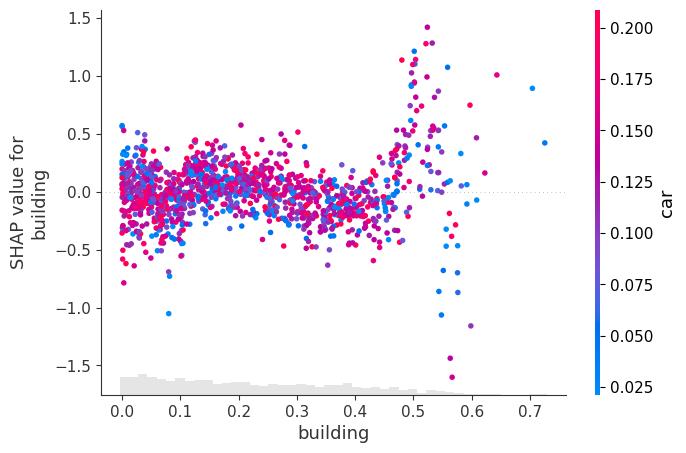

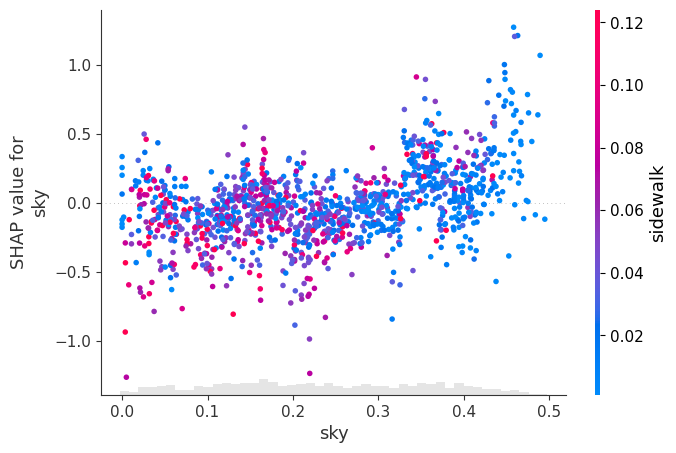

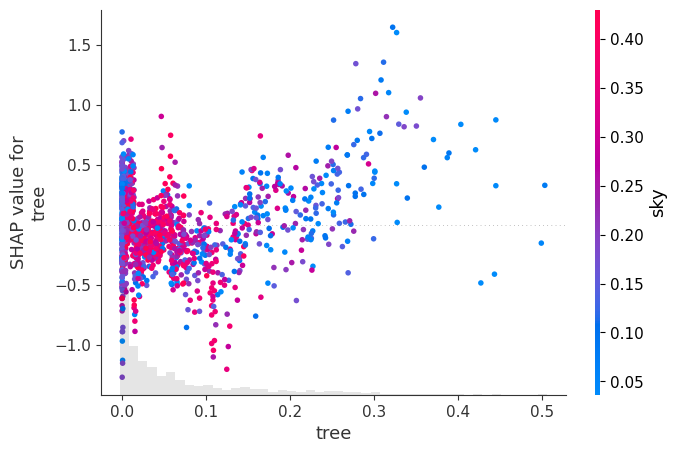

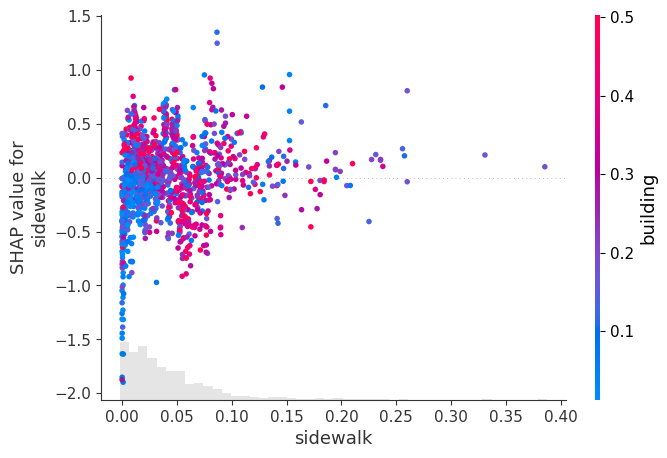

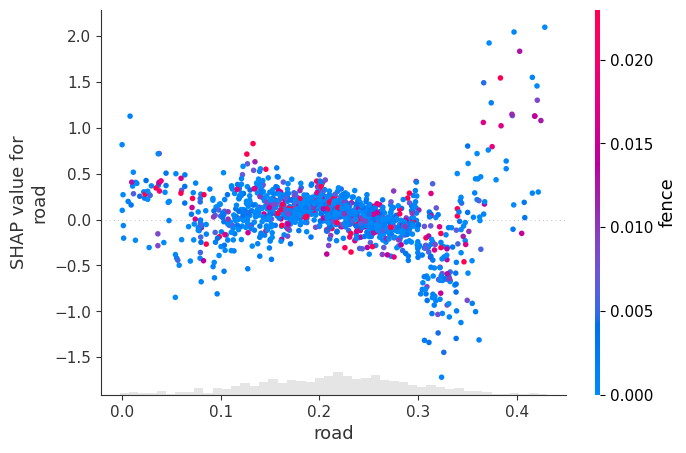

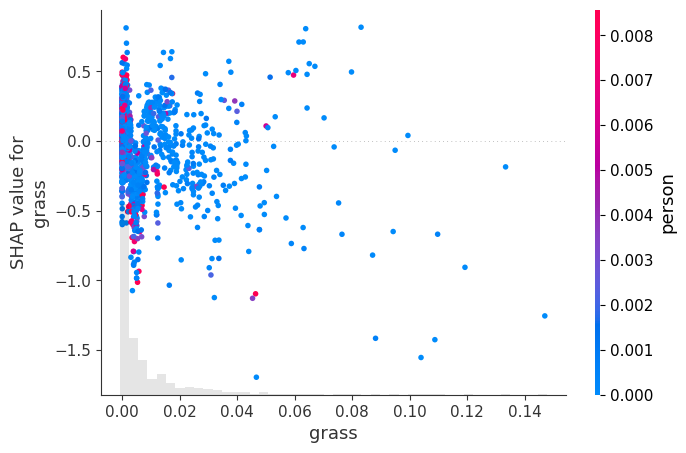

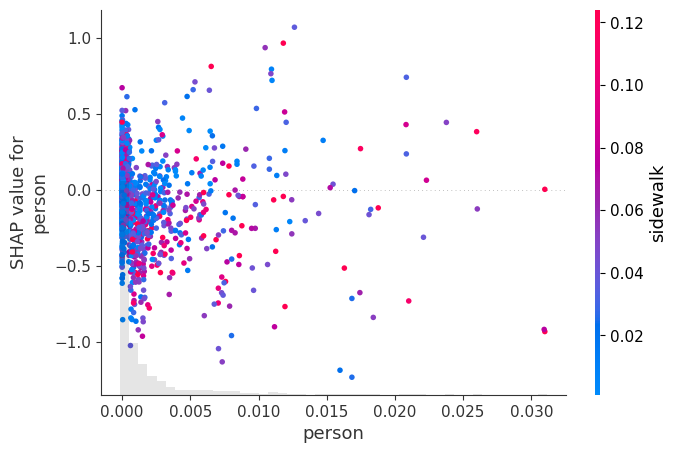

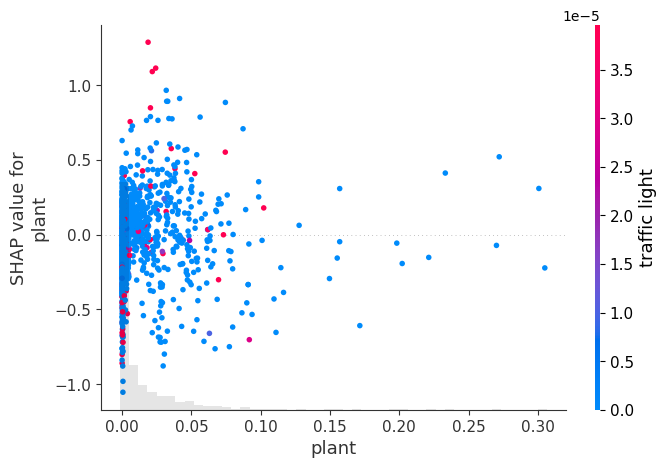

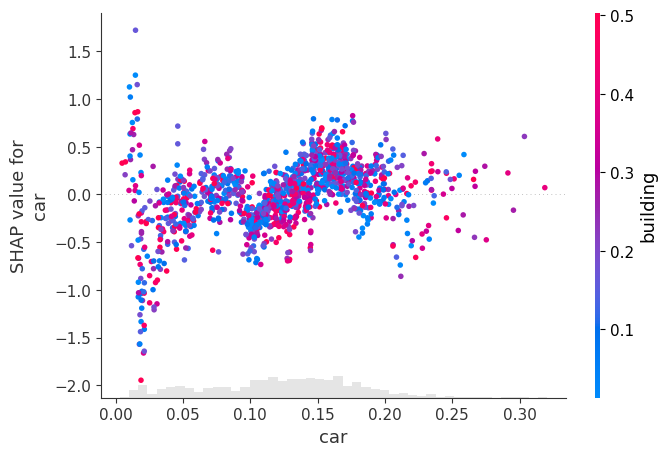

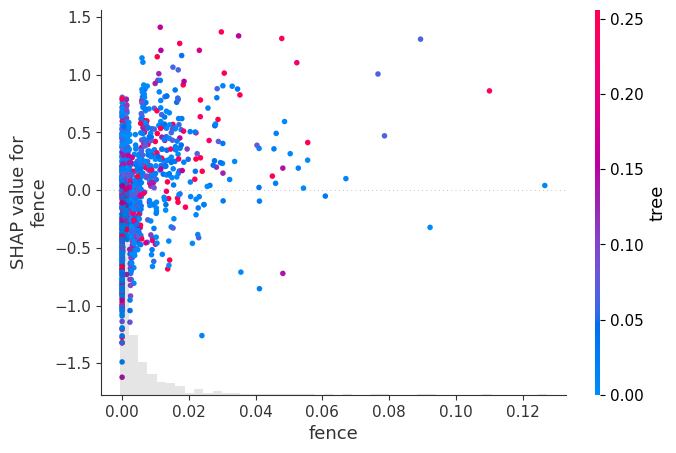

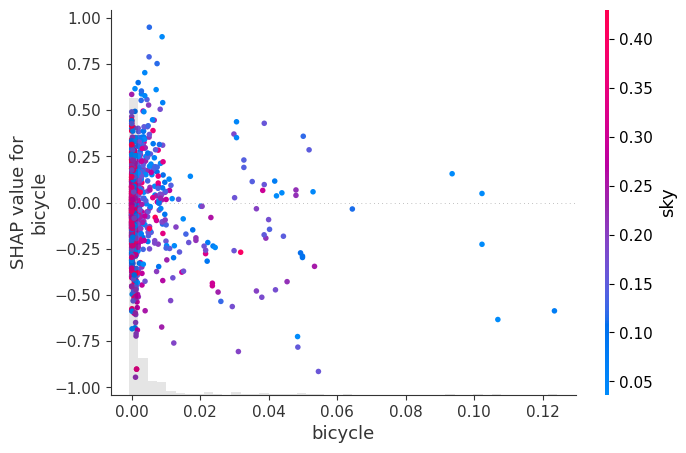

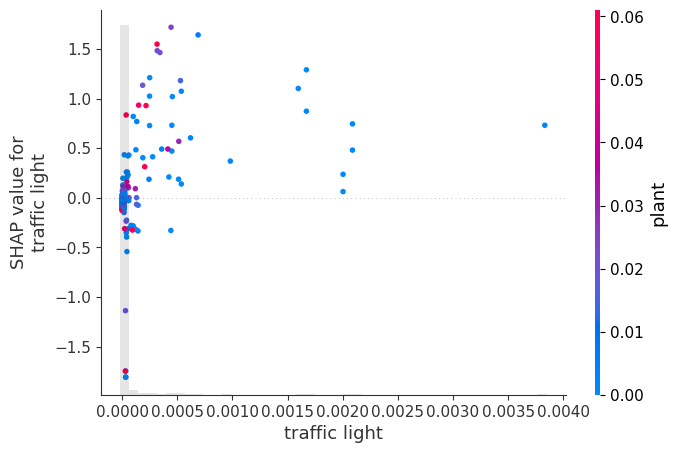

In [96]:
for i in types:
    shap.plots.scatter(shap_values[:, i], color=shap_values, show=False)
    plt.savefig(r"E:\work\sv_jourdan\素材\\"+ i +".png")
